#Walmart Sales Prediction



https://www.kaggle.com/datasets/yasserh/walmart-dataset
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

In [ ]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd #
import warnings
warnings.filterwarnings("ignore")


#Loading the dataset
df = pd.read_csv("/content/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#checking for null values for each features - missing values


df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#Displaying the shape of the dataset

df.shape

(6435, 8)

In [ ]:
#Formatting the Date Feature by splitting into four features as Day, Week, Month and Year

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True) #Pandas Data Frame : Two axes - Axis = 0 indicates rows and Axis =1 indicates columns
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [ ]:
X = df.drop('Weekly_Sales', axis=1)
print(X)
y = df['Weekly_Sales'] #Weekly sales is the Label
print(y)

      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0         1             0        42.31       2.572  211.096358         8.106   
1         1             1        38.51       2.548  211.242170         8.106   
2         1             0        39.93       2.514  211.289143         8.106   
3         1             0        46.63       2.561  211.319643         8.106   
4         1             0        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45             0        64.88       3.997  192.013558         8.684   
6431     45             0        64.89       3.985  192.170412         8.667   
6432     45             0        54.47       4.000  192.327265         8.667   
6433     45             0        56.47       3.969  192.330854         8.667   
6434     45             0        58.85       3.882  192.308899         8.667   

      Day  Week  Month  Year  
0       

<Figure size 1080x864 with 0 Axes>

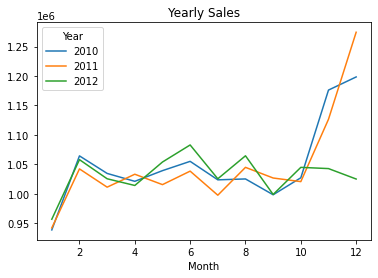

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [ ]:
#EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int64  
 8   Week          6435 non-null   int64  
 9   Month         6435 non-null   int64  
 10  Year          6435 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 553.1 KB


In [ ]:
#EDA

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,26.000000,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,14.511794,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,14.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,26.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,38.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,52.000000,12.000000,2012.000000


In [ ]:
#EDA

df.shape


(6435, 11)

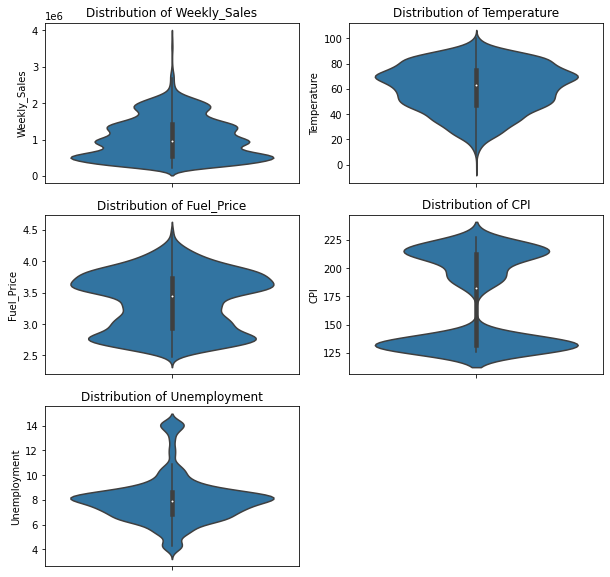

In [ ]:
#EDA

import seaborn as sns
plt.figure(figsize=(10,10))
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.violinplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

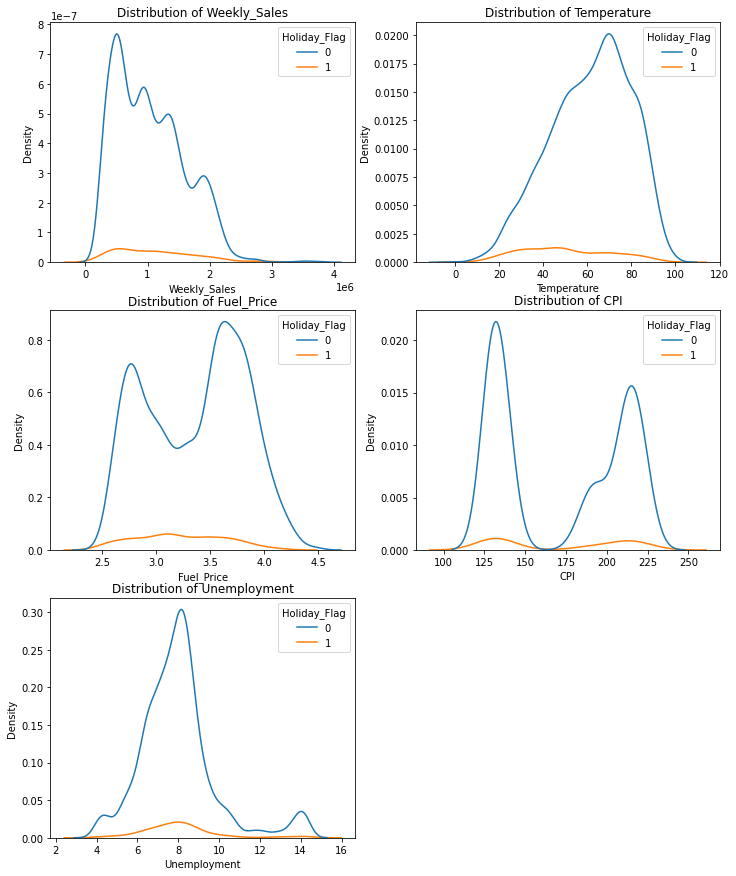

In [ ]:
#EDA

plt.figure(figsize=(12,15))
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    figure= plt.subplot(3,2,i+1)
    sns.kdeplot(data=df, x=dist_cols[i], hue='Holiday_Flag')
    plt.title(f'Distribution of {dist_cols[i]}')

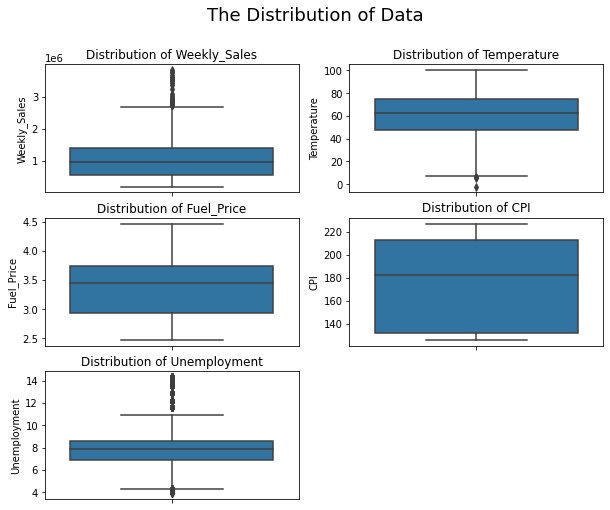

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle('The Distribution of Data', fontsize=18)
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

In [ ]:
#Standard Scaler Preprocessing
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_scaled = st.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

MODEL 1 IMPLEMENTATION



In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


model2 = DecisionTreeRegressor()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
r2_score(y_test,y_pred2)
print('-----------------')
print(model2)
print('-----------------')
print(f'MSE: {mean_squared_error(y_test,y_pred2)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred2)}')
print(f'R2 : {round(r2_score(y_test,y_pred2)*100,2)} %')

-----------------
DecisionTreeRegressor()
-----------------
MSE: 26604045672.17377
MAE: 90127.33552447554
R2 : 91.74 %


MODEL 2 IMPLEMENTATION

RANDOM FOREST REGRESSOR



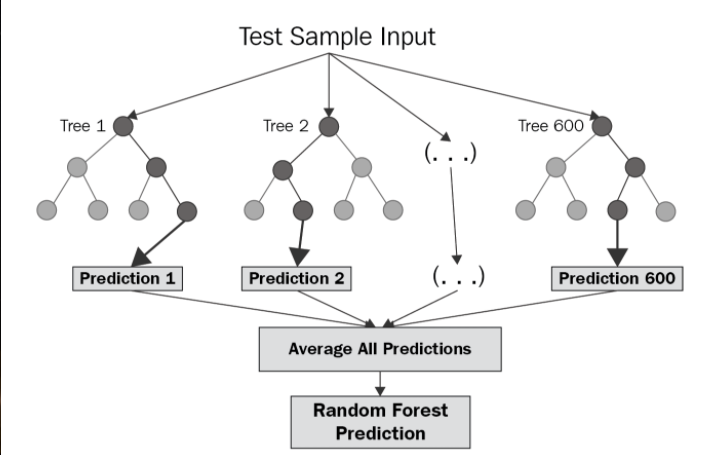


In [ ]:
#Model Implementation

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


model1 = RandomForestRegressor(n_estimators=200) #number of trees = 200
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
r2_score(y_test,y_pred)
print('-----------------')
print(model1)
print('-----------------')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

-----------------
RandomForestRegressor(n_estimators=200)
-----------------
MSE: 16730885791.068285
MAE: 70282.87845769226
R2 : 94.81 %


# **WALMART TIME SERIES FORECASTING - ARIMA MODEL**




In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math

#Loading the data from csv files.
train=pd.read_csv('/content/train.csv')
features=pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')

In [ ]:
data = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
print(data.shape)


(344181, 17)


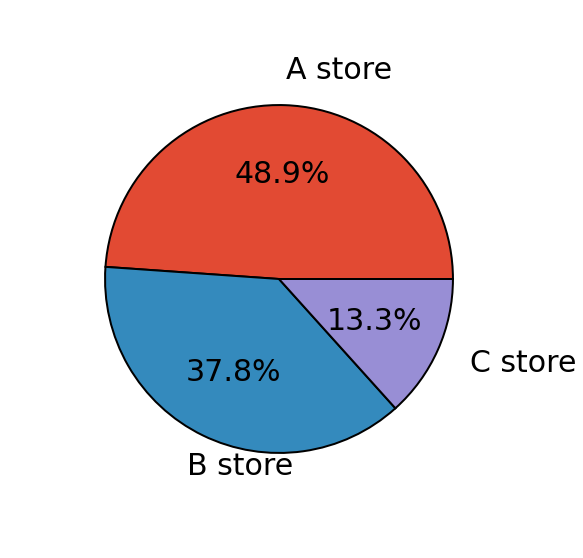

In [ ]:
#Distribution of type of store
sorted_type = stores.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion
fig, axes = plt.subplots(1,1, figsize=(10,10))
wprops={'edgecolor':'black',
      'linewidth':2}
tprops = {'fontsize':30}
axes.pie(sizes,
        labels=labels,
        explode=(0.0,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

In [ ]:
#fill missing values
data=data.fillna(0)
data.isna().sum()



Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [ ]:
data = data[data['Weekly_Sales'] >= 0]

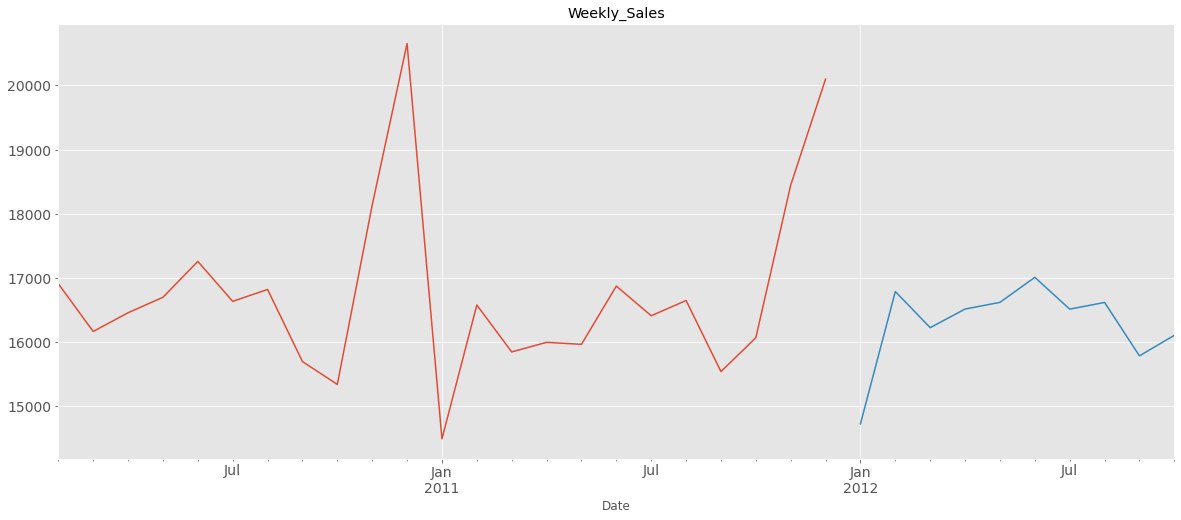

In [ ]:
#convert date to datetime format
data.Date = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data.Date
data = data.drop('Date', axis=1)
data = data.resample('MS').mean() # Resmapling the time series data with month starting first.
# Train-Test splitting of time series data
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]
# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

## PLOTS TO PROVE THAT TIME SERIES CAN BE USED

COMPARING 2 PARTICULAR STORES = STORE 4 AND STORE 6'S WEEKLY SALES

In [ ]:
data1 = pd.read_csv('train.csv')
data1.set_index('Date', inplace=True)

store4 = data1[data1.Store == 4]


sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4.head(20)


sales4.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])
# resetting date back to the index
sales4.set_index('Date',inplace = True)

In [ ]:
#store 6 data for analysis
store6 = data1[data1.Store == 6]


sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
# Grouped weekly sales by store 6

sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)

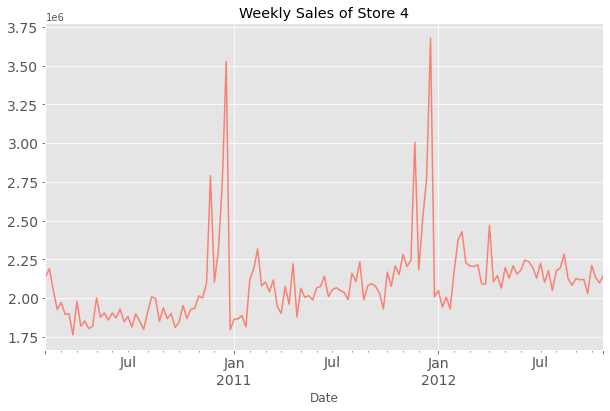

In [ ]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store 4', fontsize=14, color = 'salmon')
plt.show()

ABOVE PLOT SHOWS TRENDS

# PLOTS OF TREND AND SEASONALITY

<Figure size 432x288 with 0 Axes>

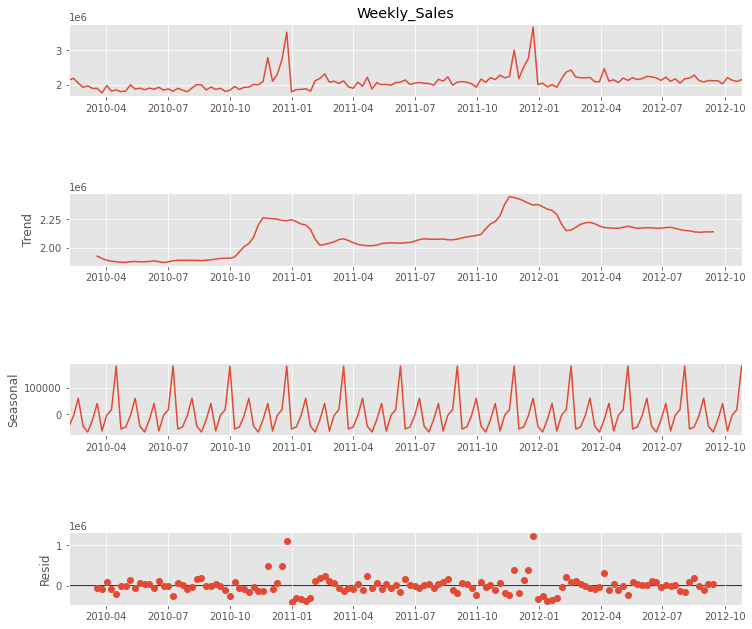

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#additive model - trend/ season as a sum
#decompose a time series into trend, seasonality
decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

<Figure size 432x288 with 0 Axes>

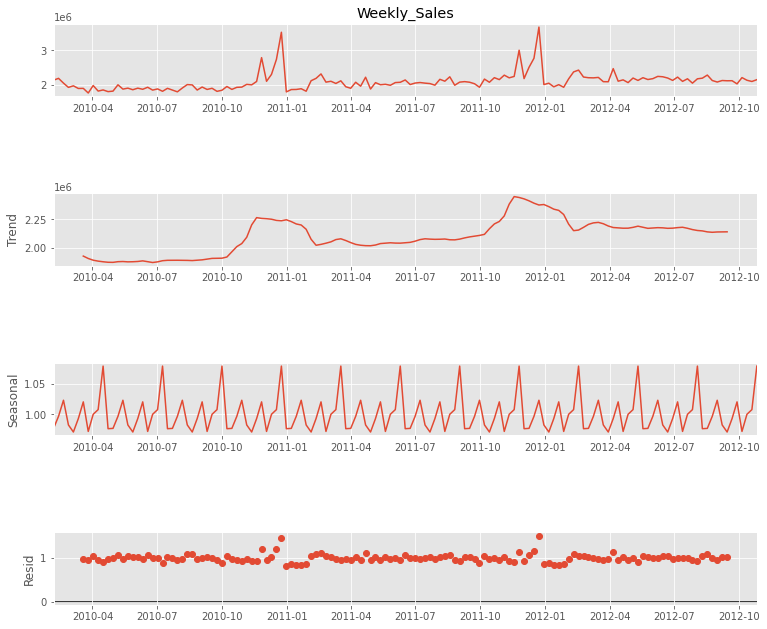

In [ ]:
decomposition = seasonal_decompose(sales4.Weekly_Sales, model= 'multiplicative', period=12)
#multiplicative model - trend/ season as a product of the components
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [ ]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

2 STORES ALMOST FOLLOW THE SAME TRENS

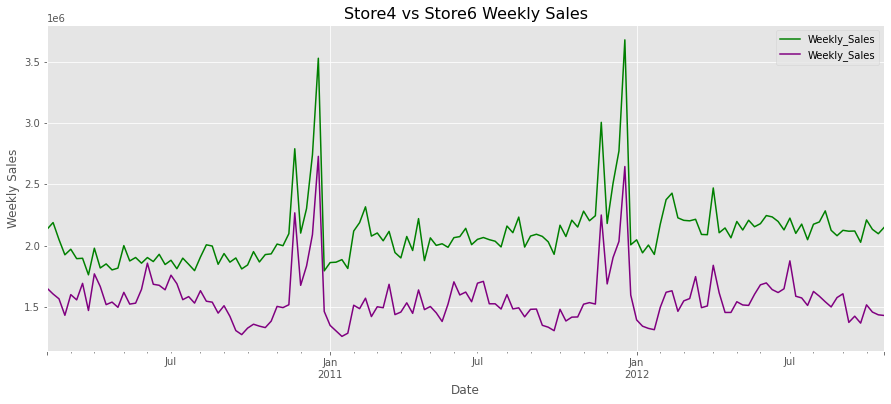

In [ ]:
y1.plot(figsize=(15, 6), legend=True, color='green')
y2.plot(figsize=(15, 6), legend=True, color='purple')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize='16')
plt.show()

# **DICKY FULLER TEST **

**NULL HYPOTHESIS :** Unit Root is present in time series data
**ALTERNATE HYPOTHESIS :** Data is Stationary (constant Mean and Variance)

In [ ]:

#TESTING FOR STATIONARITY IN DATA - DICKY FULLER TEST


from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.841851852792088
p-value: 4.519901937286265e-05
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


ADF statistic smaller than critical values - reject null hypothesis
probability much lesser than the conventional significance level 0.005

In [ ]:
! pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.2 MB/s eta 0:00:00


PDQ from auto arima


In [ ]:
from pmdarima import auto_arima
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=409.759, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=402.182, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=404.041, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=403.825, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=514.873, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=405.933, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.272 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=402.182, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=403.825, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=407.909, Time=0.19 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=404.041, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=405.9

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

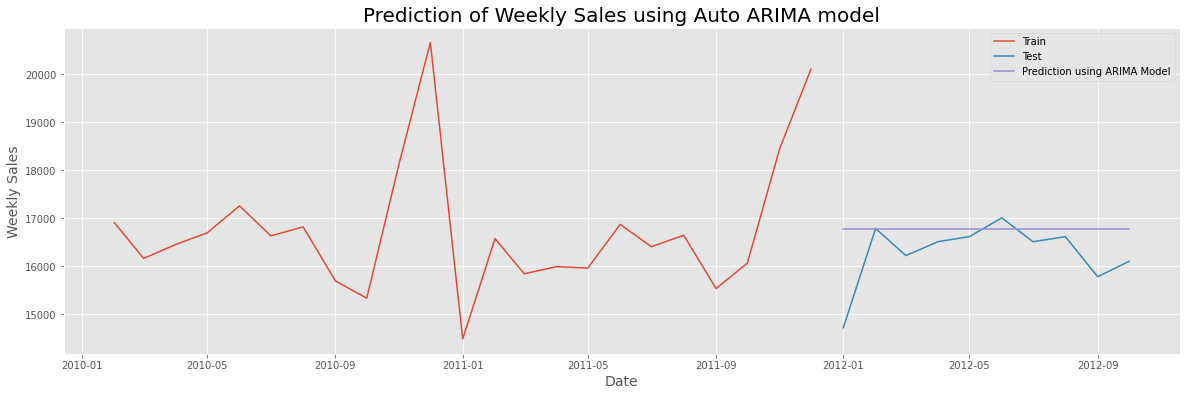

In [ ]:
# Predicting the test values using predict function.
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
# Performance metric for ARIMA model -MSE/RMSE
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

Mean Squared Error (MSE) of ARIMA:  615578.8394805616
Root Mean Squared Error (RMSE) of ARIMA:  784.588324843393
Mean Absolute Deviation (MAD) of ARIMA:  532.6614981270974


# USING REGULAR ARIMA MODEL

P D Q VALUES GENERATED USING GRID SEARCH METHOD

In [ ]:
import pandas as pd
import itertools
from statsmodels.tsa.arima.model import ARIMA


# Define the parameter ranges to search over
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of parameters
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Define a function to fit and evaluate the model at a given set of parameters
def evaluate_arima_model(data, arima_order):
    # Split the data into train and test sets
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[0:train_size], data[train_size:]

    # Fit the ARIMA model on the training data
    model = ARIMA(train_data, order=arima_order)
    model_fit = model.fit()

    # Generate predictions on the test data
    forecast = model_fit.forecast(len(test_data))

    # Calculate the mean squared error between the predictions and the test data
    mse = mean_squared_error(test_data, forecast)

    return mse

# Iterate over all combinations of parameters and evaluate the model at each one
best_mse = float('inf')
best_params = None
for param_comb in param_combinations:
    try:
        mse = evaluate_arima_model(data['Weekly_Sales'], arima_order=param_comb)
        if mse < best_mse:
            best_mse = mse
            best_params = param_comb
    except:
        continue

# Print the best parameters and the corresponding MSE
print('Best parameters:', best_params)
print('Best MSE:', best_mse)


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best parameters: (1, 1, 1)
Best MSE: 139853.2772650431


In [ ]:
import statsmodels.api as sm

# Define the ARIMA model
model = sm.tsa.ARIMA(y1, order=(1, 1, 1))

# Fit the model
results = model.fit()



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

FORECAST

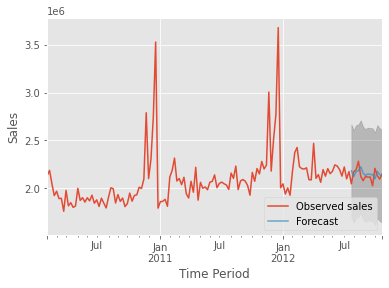

In [ ]:
ax = y1['2010':].plot(label='Observed sales')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()